<a href="https://colab.research.google.com/github/pengj7/Machine_Learning_HW/blob/main/Homework_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1 Part a

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras import Model
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the images
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = tf.keras.models.Sequential()
model.add(Conv2D(64, (5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Problem 1 Part b

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.3017 - loss: 1.8828 - val_accuracy: 0.4841 - val_loss: 1.4355
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4932 - loss: 1.4015 - val_accuracy: 0.5373 - val_loss: 1.2957
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5491 - loss: 1.2614 - val_accuracy: 0.5765 - val_loss: 1.2027
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5859 - loss: 1.1654 - val_accuracy: 0.5877 - val_loss: 1.1696
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6115 - loss: 1.0923 - val_accuracy: 0.5999 - val_loss: 1.1437
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6395 - loss: 1.0151 - val_accuracy: 0.6219 - val_loss: 1.0814
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6650 - loss: 0.9528 - val_accuracy: 0.6306 - val_loss: 1.0476
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6766 - loss: 0.9105 - val_accuracy: 0

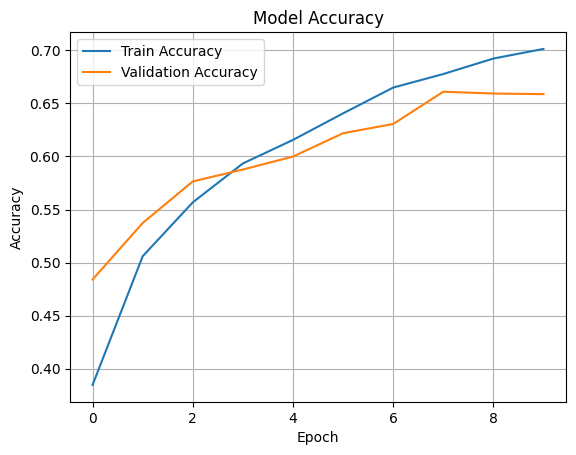

In [ ]:
from matplotlib import pyplot as plt
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load dataset
data = datasets.load_breast_cancer()

# Extract only the required features
# Feature names to use: 'worst compactness', 'worst concavity', 'worst area'
selected_features = ['worst compactness', 'worst concavity', 'worst area']
feature_indices = [list(data.feature_names).index(f) for f in selected_features]

X = data.data[:, feature_indices]
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Train SVM with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

# Predict and evaluate
y_pred_linear = svm_linear.predict(X_test)
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy with Linear Kernel: {acc_linear:.4f}")


Accuracy with Linear Kernel: 0.9912


In [ ]:
# Train SVM with RBF kernel and C=2
svm_rbf = SVC(kernel='rbf', C=2)
svm_rbf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rbf = svm_rbf.predict(X_test)
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy with RBF Kernel (C=2): {acc_rbf:.4f}")


Accuracy with RBF Kernel (C=2): 0.9649
